In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [74]:
ipl_df =pd.read_csv('/content/drive/MyDrive/DATASETS/cleaned_ipl_dataset_2008_to_2022.csv')

In [75]:
ipl_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,...,1,1,1,1,1,1,1,6,8,MO
1,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,...,1,1,1,1,1,1,1,2,7,PP
2,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,...,1,1,1,1,1,1,1,3,1,PP
3,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,...,1,1,1,1,1,1,1,3,2,PP
4,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,...,1,1,1,1,1,1,1,3,3,PP


In [76]:
ipl_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'bowl_style', 'bowling_style', 'bat_style',
       'batting_style', 'wides_cnt_balls', 'noballs_cnt_balls',
       'noballs_cnt_balls_bowler', 'byes_cnt_balls', 'legbyes_cnt_balls',
       'legal_ball', 'legal_ball_bowler', 'over_no', 'ball_no', 'phase'],
      dtype='object')

In [77]:
ipl_df = ipl_df[(ipl_df.innings == 1) | (ipl_df.innings == 2)]

In [78]:
ipl_df['total_runs'] = ipl_df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis = 1)


In [79]:
ipl_df['isOut'] = ipl_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)

In [80]:
ipl_df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [81]:
ipl_df[ipl_df.batting_team == 'Mumbai Indians'].total_runs.value_counts()

1    11336
0     9974
4     3198
2     1721
6     1403
3      104
5       54
7        7
Name: total_runs, dtype: int64

In [82]:
ipl_df[ipl_df.batting_team == 'Chennai Super Kings'].total_runs.value_counts()

1    10515
0     8661
4     2829
2     1706
6     1259
3       98
5       46
7        9
Name: total_runs, dtype: int64

In [83]:
t1 = 'Mumbai Indians'
t2 = 'Chennai Super Kings'

In [84]:
t1_outs = ipl_df[ipl_df.batting_team == t1].isOut.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isOut.sum()

In [85]:
t1_outcomes = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()

In [86]:
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [87]:
t1_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t1_outcomes_count.append(t1_outcomes[outcome])
        else:
            t1_outcomes_count.append(t1_outs)
    except:
        t1_outcomes_count.append(0)
        

t2_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t2_outcomes_count.append(t2_outcomes[outcome])
        else:
            t2_outcomes_count.append(t2_outs)
    except:
        t2_outcomes_count.append(0)

In [88]:
t1_outcomes_count

[9974, 11336, 1721, 104, 3198, 1403, 1378]

In [89]:
t2_outcomes_count

[8661, 10515, 1706, 98, 2829, 1259, 1087]

In [90]:
t1_pb = [i/sum(t1_outcomes_count) for i in t1_outcomes_count]
t2_pb = [i/sum(t2_outcomes_count) for i in t2_outcomes_count]

In [91]:
t1_pb, t2_pb

([0.3425843236930686,
  0.3893659407845023,
  0.05911245448924916,
  0.003572164594353232,
  0.10984406127636188,
  0.04818987428728447,
  0.047331180875180325],
 [0.33114127317912445,
  0.4020263811890652,
  0.06522653412349455,
  0.0037468935194035556,
  0.10816287516727204,
  0.04813611164213343,
  0.041559931179506786])

In [92]:
t1_cum_pb = list(np.cumsum(t1_pb))
t2_cum_pb = list(np.cumsum(t2_pb))

In [93]:
def innings_1_runs(curr_overs, curr_score, curr_wickets):
    i1p_0 = t1_cum_pb[0]
    i1p_1 = t1_cum_pb[1]
    i1p_2 = t1_cum_pb[2]
    i1p_3 = t1_cum_pb[3]
    i1p_4 = t1_cum_pb[4]
    i1p_6 = t1_cum_pb[5]
    i1p_w = 1

    pred_runs = curr_score
    pred_wks = curr_wickets
    
    over_ball = curr_overs
    over_number = int(str(over_ball).split('.')[0])
    ball_number = int(str(over_ball).split('.')[1])
    
    current_balls = over_number*6 + ball_number 
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break

    return pred_runs

In [94]:
def innings_2_runs(curr_overs, curr_score, curr_wickets, target):
    i2p_0 = t2_cum_pb[0]
    i2p_1 = t2_cum_pb[1]
    i2p_2 = t2_cum_pb[2]
    i2p_3 = t2_cum_pb[3]
    i2p_4 = t2_cum_pb[4]
    i2p_6 = t2_cum_pb[5]
    i2p_w = 1

    pred_runs = curr_score
    pred_wks = curr_wickets
    
    over_ball = curr_overs
    over_number = int(str(over_ball).split('.')[0])
    ball_number = int(str(over_ball).split('.')[1])
    
    current_balls = over_number*6 + ball_number 
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break
        
        if pred_runs > target:
            break

    return pred_runs

In [95]:
mdf = ipl_df[ipl_df.match_id == 1181768]

In [96]:
mdf.reset_index(inplace = True, drop = True)

In [97]:
df_ing1 = mdf[mdf.innings == 1]
df_ing2 = mdf[mdf.innings == 2]

In [98]:
df_ing1 = df_ing1.sort_values('ball', ascending = True)
df_ing2 = df_ing2.sort_values('ball', ascending = True)

In [99]:
df_ing1.reset_index(inplace = True, drop = True)
df_ing2.reset_index(inplace = True, drop = True)

In [100]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing1_runs_pred = []

for i in range(len(df_ing1)):
    curr_score += df_ing1.total_runs[i]
    curr_overs = df_ing1.ball[i]
    curr_wickets += df_ing1.isOut[i]
    
    prediction = innings_1_runs(curr_overs, curr_score, curr_wickets)
    ing1_runs_pred.append(prediction)

In [101]:
ing1_actual_score = sum(df_ing1.total_runs)

In [102]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0
target = ing1_actual_score

ing2_runs_pred = []

for i in range(len(df_ing2)):
    curr_score += df_ing2.total_runs[i]
    curr_overs = df_ing2.ball[i]
    curr_wickets += df_ing2.isOut[i]
    
    prediction = innings_2_runs(curr_overs, curr_score, curr_wickets, target)

    ing2_runs_pred.append(prediction)

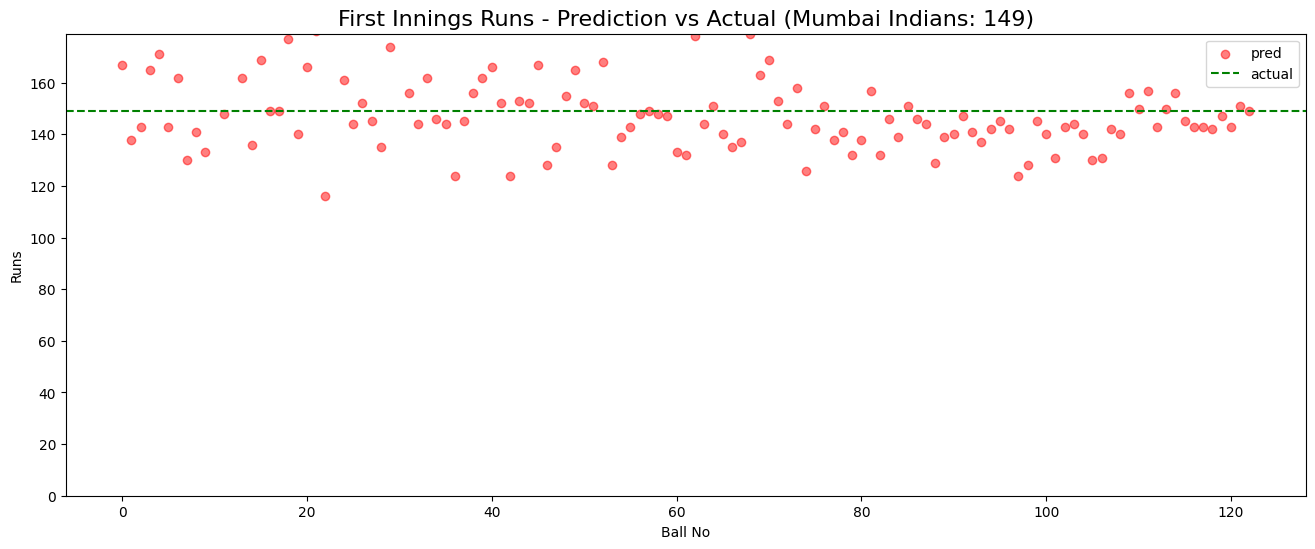

In [103]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing1_runs_pred))], ing1_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing1_actual_score + 30)
plt.axhline(ing1_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('First Innings Runs - Prediction vs Actual (' + t1 + ': ' + str(ing1_actual_score) +  ')', fontsize = 16)
plt.legend()
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.show()

In [104]:
ing2_actual_score = sum(df_ing2.total_runs)

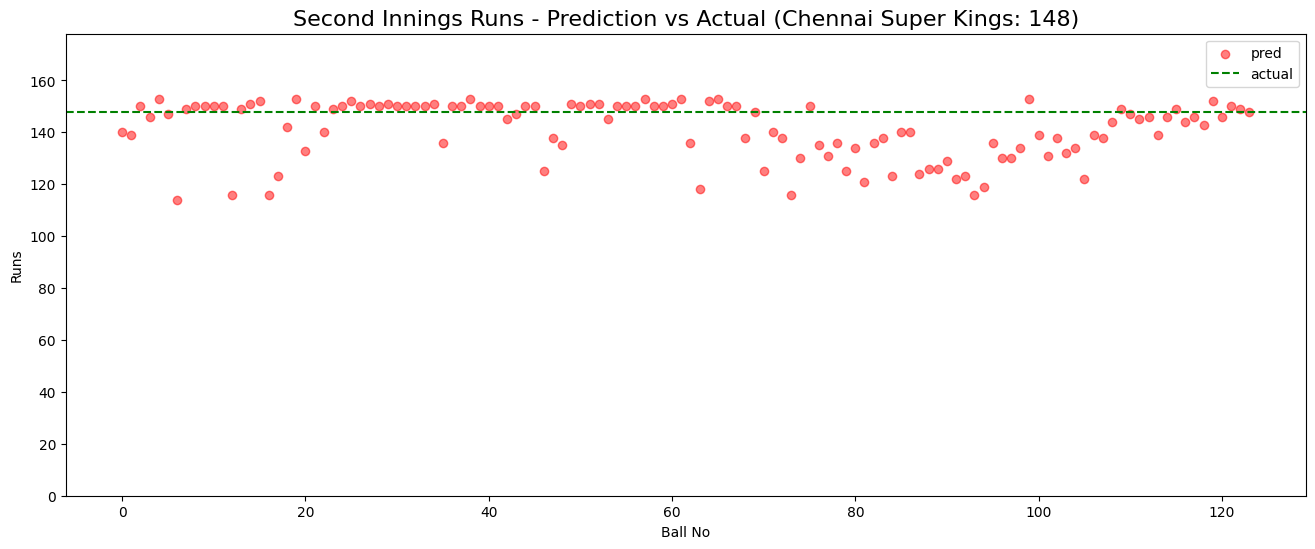

In [105]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing2_actual_score + 30)
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('Second Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(ing2_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [106]:
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

for i in range(len(df_ing1)):
    
    ing1_curr_score += df_ing1.total_runs[i]
    ing1_curr_overs = df_ing1.ball[i]
    ing1_curr_wickets += df_ing1.isOut[i]
    
    ing2_curr_score = 0
    ing2_curr_wickets = 0
    ing2_curr_overs = 0.0

    for j in range(100):
        
        ing1_prediction = innings_1_runs(ing1_curr_overs, ing1_curr_score, ing1_curr_wickets)
        target = ing1_prediction
        
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

In [107]:
ing2_curr_score = 0
ing2_curr_wickets = 0
ing2_curr_overs = 0.0

for i in range(len(df_ing2)):
    
    target = ing1_actual_score

    ing2_curr_score += df_ing2.total_runs[i]
    ing2_curr_wickets += df_ing2.isOut[i]
    ing2_curr_overs = df_ing2.ball[i]
    
    for j in range(100):
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)

        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

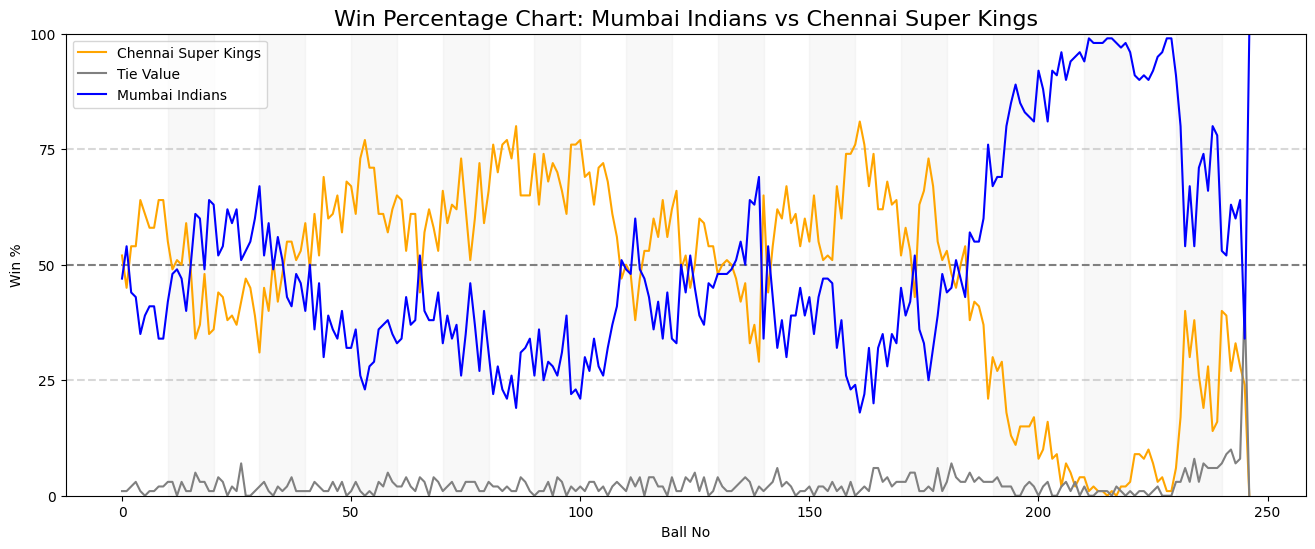

In [108]:
plt.figure(figsize = (16, 6))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(mdf), 20):
    if i < len(mdf) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')
        
plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])

plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()